In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import statsmodels
from pandas_datareader import data
import datetime
import quandl

In [28]:
start= datetime.datetime(2015, 1, 1)  # The start of the year for example
end= datetime.datetime(2019, 7, 30)

In [29]:
ticker_1 = "adbe"
ticker_2 = "vgt"

In [30]:
df_tickr1 = data.DataReader(name= ticker_1, data_source= "yahoo", start= start, end= end)
df_tickr2 = data.DataReader(name= ticker_2, data_source= "yahoo", start= start, end= end)

In [31]:
df_tickr1.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-10,309.320007,305.100006,305.100006,306.980011,1954100,306.980011
2019-07-11,310.170013,305.899994,307.390015,307.600006,1951500,307.600006
2019-07-12,309.700012,304.959991,308.010010,309.420013,1624800,309.420013
2019-07-15,310.459991,307.720001,310.000000,308.760010,1161600,308.760010
2019-07-16,308.459991,305.070007,308.000000,305.700012,1838700,305.700012


In [32]:
df_tickr2.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-10,218.009995,216.139999,216.149994,216.679993,610100.0,216.679993
2019-07-11,218.149994,216.649994,217.240005,217.399994,381600.0,217.399994
2019-07-12,219.160004,217.690002,217.929993,219.139999,304500.0,219.139999
2019-07-15,220.000000,219.119995,219.589996,219.679993,280600.0,219.679993
2019-07-16,219.509995,217.369995,219.509995,217.820007,1653000.0,217.820007


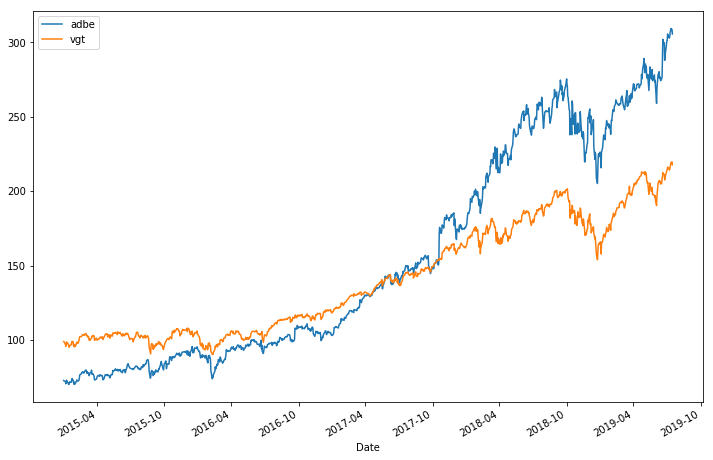

In [33]:
df_tickr1['Adj Close'].plot(label='{}'.format(ticker_1),figsize=(12,8))
df_tickr2['Adj Close'].plot(label='{}'.format(ticker_2))
plt.legend();

In [34]:
spread_ratio = df_tickr1['Adj Close']/df_tickr2['Adj Close']

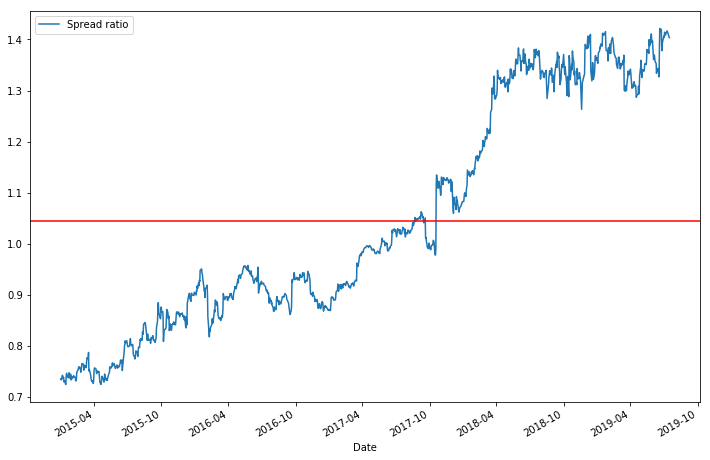

In [35]:
spread_ratio.plot(label='Spread ratio',figsize=(12,8))
plt.axhline(spread_ratio.mean(),c='r')
plt.legend();

In [36]:
def zscore(stocks):
    return (stocks - stocks.mean()) / np.std(stocks)

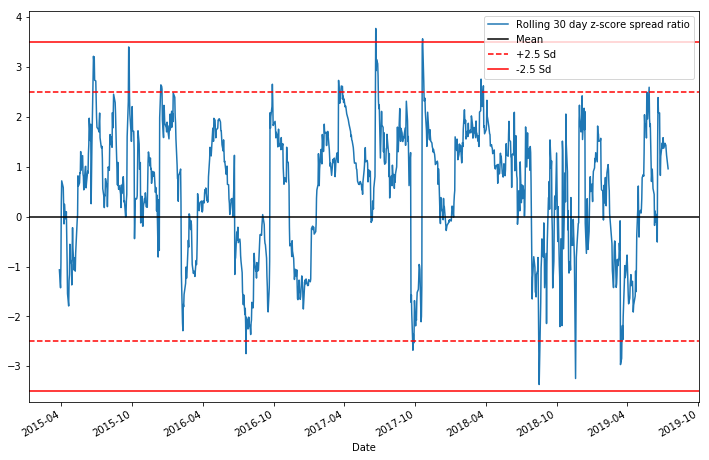

In [37]:
#1 day moving average of the price spread
spreadratio_mavg1 = spread_ratio.rolling(1).mean()

# 30 day moving average of the price spread
spreadratio_mavg30 = spread_ratio.rolling(60).mean()

# Take a rolling 30 day standard deviation
std_30ratio = spread_ratio.rolling(60).std()

# Compute the z score for each day
zscore_30_1_ratio = (spreadratio_mavg1 - spreadratio_mavg30)/std_30ratio



zscore_30_1_ratio.plot(figsize=(12,8),label='Rolling 30 day Z score for spread ratio')
plt.axhline(0, color='black')
plt.axhline(2.5, color='red', linestyle='--')
plt.axhline(3.5, color='red', linestyle='-')
plt.axhline(-3.5, color='red', linestyle='-')
plt.axhline(-2.5, color='red',linestyle='--')
plt.legend(['Rolling 30 day z-score spread ratio', 'Mean', '+2.5 Sd', '-2.5 Sd']);

In [38]:
from statsmodels.tsa.stattools import coint

In [39]:
y0 = df_tickr1['Adj Close']
y1 = df_tickr2['Adj Close']

In [40]:
t_stat_summary = statsmodels.tsa.stattools.coint(y0, y1, trend='c', method='aeg', maxlag=None, autolag='aic', return_results=True) 

In [41]:
print('----------------------------------------')
print('T-stat for the pair {} VS {}:'.format(ticker_1,ticker_2), t_stat_summary[0])
print('Alpha value for the T-stat:  {}'.format(t_stat_summary[1]))
print('--------------------------------------')
print('T-stat 99%:  {}'.format(t_stat_summary[2][0]))
print('T-stat 95%:  {}'.format(t_stat_summary[2][1]))
print('T-stat 90%:  {}'.format(t_stat_summary[2][2]))

----------------------------------------
T-stat for the pair adbe VS vgt: -2.9801188485450787
Alpha value for the T-stat:  0.11500718787968162
--------------------------------------
T-stat 99%:  -3.9060642628166478
T-stat 95%:  -3.341490280317479
T-stat 90%:  -3.0481691795563495


In [42]:
np.corrcoef(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[1.        , 0.98723829],
       [0.98723829, 1.        ]])

In [43]:
np.cov(df_tickr1['Adj Close'],df_tickr2['Adj Close'])

array([[5189.13361651, 2658.31441232],
       [2658.31441232, 1397.24916184]])

# Differencing method of spread; GARCH volatility method of spread and final use log returns minus average log returns of spread over GARCH - to be done next

In [44]:
zscore_30_1_ratio

Date
2014-12-31         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
2015-01-09         NaN
2015-01-12         NaN
2015-01-13         NaN
2015-01-14         NaN
2015-01-15         NaN
2015-01-16         NaN
2015-01-20         NaN
2015-01-21         NaN
2015-01-22         NaN
2015-01-23         NaN
2015-01-26         NaN
2015-01-27         NaN
2015-01-28         NaN
2015-01-29         NaN
2015-01-30         NaN
2015-02-02         NaN
2015-02-03         NaN
2015-02-04         NaN
2015-02-05         NaN
2015-02-06         NaN
2015-02-09         NaN
2015-02-10         NaN
2015-02-11         NaN
2015-02-12         NaN
                ...   
2019-06-04    0.865316
2019-06-05    0.956209
2019-06-06    0.785972
2019-06-07    0.566772
2019-06-10    0.448632
2019-06-11   -0.173779
2019-06-12    0.117023
2019-06-13   -0.106415
2019-06-14   -0.050550
2019-06-17    0.048887
2019-06-18   -0.507084
2019-06-19    1.505911
2019-0

In [45]:
statsmodels.tsa.stattools.adfuller(y1, maxlag=None, regression='c', autolag='t-stat', store=False, regresults=False)

(0.4102396302142327,
 0.9818738541619226,
 20,
 1121,
 {'1%': -3.436196866494929,
  '5%': -2.864121720649023,
  '10%': -2.568144581443706},
 2.623576396680562)